In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
path = "Survey.csv"
df = pd.read_csv(path)

In [3]:
df.head(3)

,Timestamp,Nama,Email,Jurusan - Prodi? (Contoh isian: Teknologi Informasi - Sistem Informasi),"Saat perkuliahan daring, perangkat yang paling sering digunakan untuk mengikuti perkuliahan. Jawaban bisa lebih dari satu","Saat perkuliahan daring, Sebagian besar dimana (lokasi) anda mengakses perkuliahan daring tersebut? (Contoh isian: Jawa Barat-Depok)","Saat perkuliahan daring, anda menggunakan media internet","Apakah saat perkuliahan daring, anda berbagi media internet dan atau perangkat dengan anggota keluarga atau teman lainnya ?","Saat perkuliahan daring dengan model asyncronous (tanpa video conference), mayoritas perkuliahan menggunakan media pembelajaran","Saat perkuliahan daring dengan model syncronous (menggunakan video conference), mayoritas perkuliahan menggunakan media pembelajaran",Bagaimana kecepatan akses internet di lokasi anda berada saat dilaksanakannya perkuliahan daring?,"Dalam sepekan, rata-rata durasi waktu anda dalam mengakses internet untuk kuliah daring",Segmen waktu terbesar penggunaan internet selama belajar daring,"Rata-rata biaya yang dikeluarkan (misal: untuk membeli paket internet, biaya warnet, dll) untuk akses internet selama 1 bulan",Kendala terbesar anda dalam akses internet saat belajar daring,"Dalam 1 tahun akademik ini (TA 2020/2021), bagaimana kepuasan anda dalam perkuliahan secara daring ?",Apa harapan anda di masa depan terkait perkuliahan daring ini
0,2021/08/15 3:34:24 PM GMT+7,Vanessa Balqis,vanessa20si@mahasiswa.pcr.ac.id,D4 - Sistem Informasi,PC/Laptop;Smartphone,Riau - Duri,Wifi,Iya,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Kecepatan internet di daerah,3,Semoga lebih terstruktur lagi
1,2021/08/15 3:35:11 PM GMT+7,irfan,irfan20si@mahasiswa.pcr.ac.id,D4 Sistem informasi,PC/Laptop,Pekanbaru-Riau,Paket Data,Iya,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Keterbatasan kuota internet,3,semoga pihak kmpus ikut membantu dalam mensupl...
2,2021/08/15 3:35:25 PM GMT+7,M. Bimby kurniawan,Bimby2959@gmail.com,D4 - Teknik Mesin,PC/Laptop;Smartphone;Tablet,Riau-Pekanbaru,Paket Data,Tidak,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Keterbatasan kuota internet,1,Banyak kuota bantuan


In [4]:
df.columns = ['time', 'nama', 'email','jur','perangkat','lokasi','koneksi','sharing','kulasync','kulsync','kecepatan','durasi','segmenwaktu','biayabulanan','kendala','kepuasan','harapan']

In [5]:
df.head(3)

,time,nama,email,jur,perangkat,lokasi,koneksi,sharing,kulasync,kulsync,kecepatan,durasi,segmenwaktu,biayabulanan,kendala,kepuasan,harapan
0,2021/08/15 3:34:24 PM GMT+7,Vanessa Balqis,vanessa20si@mahasiswa.pcr.ac.id,D4 - Sistem Informasi,PC/Laptop;Smartphone,Riau - Duri,Wifi,Iya,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Kecepatan internet di daerah,3,Semoga lebih terstruktur lagi
1,2021/08/15 3:35:11 PM GMT+7,irfan,irfan20si@mahasiswa.pcr.ac.id,D4 Sistem informasi,PC/Laptop,Pekanbaru-Riau,Paket Data,Iya,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Keterbatasan kuota internet,3,semoga pihak kmpus ikut membantu dalam mensupl...
2,2021/08/15 3:35:25 PM GMT+7,M. Bimby kurniawan,Bimby2959@gmail.com,D4 - Teknik Mesin,PC/Laptop;Smartphone;Tablet,Riau-Pekanbaru,Paket Data,Tidak,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Keterbatasan kuota internet,1,Banyak kuota bantuan


In [6]:
df['kendala'].unique()

array(['Kecepatan internet di daerah', 'Keterbatasan kuota internet',
       'Kadang sinyal hilang timbul', 'Perangkat tidak mendukung'],
      dtype=object)

In [7]:
df_clean = df.loc[:,['lokasi','koneksi','sharing','kulasync','kulsync','kecepatan','durasi','segmenwaktu','biayabulanan','kendala','kepuasan']]

In [8]:
df_clean.head(3)

,lokasi,koneksi,sharing,kulasync,kulsync,kecepatan,durasi,segmenwaktu,biayabulanan,kendala,kepuasan
0,Riau - Duri,Wifi,Iya,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Kecepatan internet di daerah,3
1,Pekanbaru-Riau,Paket Data,Iya,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Keterbatasan kuota internet,3
2,Riau-Pekanbaru,Paket Data,Tidak,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Keterbatasan kuota internet,1


In [9]:
df_clean.groupby('koneksi')['kepuasan'].max()

koneksi
Paket Data       3
Rental Warnet    2
Wifi             3
Name: kepuasan, dtype: int64

In [10]:
df_clean.groupby('koneksi')['kepuasan'].min()

koneksi
Paket Data       1
Rental Warnet    2
Wifi             1
Name: kepuasan, dtype: int64

In [11]:
df_clean.groupby('koneksi')['kepuasan'].std()

koneksi
Paket Data       0.507917
Rental Warnet         NaN
Wifi             0.556148
Name: kepuasan, dtype: float64

In [12]:
df_clean.describe()

,kepuasan
count,363.000000
mean,1.939394
std,0.527337
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,3.000000


In [13]:
df_clean

,lokasi,koneksi,sharing,kulasync,kulsync,kecepatan,durasi,segmenwaktu,biayabulanan,kendala,kepuasan
0,Riau - Duri,Wifi,Iya,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Kecepatan internet di daerah,3
1,Pekanbaru-Riau,Paket Data,Iya,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Keterbatasan kuota internet,3
2,Riau-Pekanbaru,Paket Data,Tidak,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Keterbatasan kuota internet,1
3,Rumbai - pekanbaru,Paket Data,Iya,Google Classroom,Google Meet,Biasa saja,<= 8 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,2
4,Riau - Pekanbaru,Paket Data,Iya,Google Classroom,Google Meet,Kadang susah sinyal,> 8 jam dan <= 40 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,3
...,...,...,...,...,...,...,...,...,...,...,...
358,Riau - Pekanbaru,Wifi,Iya,Google Classroom,Google Meet,Biasa saja,> 8 jam dan <= 40 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,2
359,Riau,Paket Data,Iya,Google Classroom,Google Meet,Kadang susah sinyal,<= 8 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,2
360,Riau-Pekanbaru,Wifi,Iya,Google Classroom,Zoom,Biasa saja,> 8 jam dan <= 40 jam,Malam,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,2
361,Jawa barat - depok,Wifi,Iya,E-Learning Kampus,Google Meet,Biasa saja,> 8 jam dan <= 40 jam,Pagi,> 100.000 dan <=500.000,Kecepatan internet di daerah,2


# Melakukan Transformasi Data

Melakukan split kolom lokasi menjadi menjadi 2, yaitu: Provinsi (prov) dan kota/kabupaten (kota). Terlebih dahulu bersihkan data pada lokasi yang masih memiliki spasi dan tanda strip (-)

In [14]:
df_clean['preprocessed'] = df_clean['lokasi'].apply(lambda address: address.replace(' ','').lower())
df_clean

,lokasi,koneksi,sharing,kulasync,kulsync,kecepatan,durasi,segmenwaktu,biayabulanan,kendala,kepuasan,preprocessed
0,Riau - Duri,Wifi,Iya,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Kecepatan internet di daerah,3,riau-duri
1,Pekanbaru-Riau,Paket Data,Iya,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Keterbatasan kuota internet,3,pekanbaru-riau
2,Riau-Pekanbaru,Paket Data,Tidak,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Keterbatasan kuota internet,1,riau-pekanbaru
3,Rumbai - pekanbaru,Paket Data,Iya,Google Classroom,Google Meet,Biasa saja,<= 8 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,2,rumbai-pekanbaru
4,Riau - Pekanbaru,Paket Data,Iya,Google Classroom,Google Meet,Kadang susah sinyal,> 8 jam dan <= 40 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,3,riau-pekanbaru
...,...,...,...,...,...,...,...,...,...,...,...,...
358,Riau - Pekanbaru,Wifi,Iya,Google Classroom,Google Meet,Biasa saja,> 8 jam dan <= 40 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,2,riau-pekanbaru
359,Riau,Paket Data,Iya,Google Classroom,Google Meet,Kadang susah sinyal,<= 8 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,2,riau
360,Riau-Pekanbaru,Wifi,Iya,Google Classroom,Zoom,Biasa saja,> 8 jam dan <= 40 jam,Malam,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,2,riau-pekanbaru
361,Jawa barat - depok,Wifi,Iya,E-Learning Kampus,Google Meet,Biasa saja,> 8 jam dan <= 40 jam,Pagi,> 100.000 dan <=500.000,Kecepatan internet di daerah,2,jawabarat-depok


In [15]:
# melakukan split kolom preprocessed menjadi kolom prov dan kota

df_clean[['prov','kota','x']] = df_clean.preprocessed.str.split('-',expand=True)
df_clean.drop('x',axis='columns',inplace=True)
df_clean

,lokasi,koneksi,sharing,kulasync,kulsync,kecepatan,durasi,segmenwaktu,biayabulanan,kendala,kepuasan,preprocessed,prov,kota
0,Riau - Duri,Wifi,Iya,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Kecepatan internet di daerah,3,riau-duri,riau,duri
1,Pekanbaru-Riau,Paket Data,Iya,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Keterbatasan kuota internet,3,pekanbaru-riau,pekanbaru,riau
2,Riau-Pekanbaru,Paket Data,Tidak,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Keterbatasan kuota internet,1,riau-pekanbaru,riau,pekanbaru
3,Rumbai - pekanbaru,Paket Data,Iya,Google Classroom,Google Meet,Biasa saja,<= 8 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,2,rumbai-pekanbaru,rumbai,pekanbaru
4,Riau - Pekanbaru,Paket Data,Iya,Google Classroom,Google Meet,Kadang susah sinyal,> 8 jam dan <= 40 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,3,riau-pekanbaru,riau,pekanbaru
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,Riau - Pekanbaru,Wifi,Iya,Google Classroom,Google Meet,Biasa saja,> 8 jam dan <= 40 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,2,riau-pekanbaru,riau,pekanbaru
359,Riau,Paket Data,Iya,Google Classroom,Google Meet,Kadang susah sinyal,<= 8 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,2,riau,riau,None
360,Riau-Pekanbaru,Wifi,Iya,Google Classroom,Zoom,Biasa saja,> 8 jam dan <= 40 jam,Malam,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,2,riau-pekanbaru,riau,pekanbaru
361,Jawa barat - depok,Wifi,Iya,E-Learning Kampus,Google Meet,Biasa saja,> 8 jam dan <= 40 jam,Pagi,> 100.000 dan <=500.000,Kecepatan internet di daerah,2,jawabarat-depok,jawabarat,depok


In [16]:
# Menampilkan dan urutan baru data tabel df_clean

df_clean = df_clean.loc[:,['prov','kota','koneksi','sharing','kulasync','kulsync','kecepatan','durasi','segmenwaktu','biayabulanan','kendala','kepuasan']]
df_clean

,prov,kota,koneksi,sharing,kulasync,kulsync,kecepatan,durasi,segmenwaktu,biayabulanan,kendala,kepuasan
0,riau,duri,Wifi,Iya,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Kecepatan internet di daerah,3
1,pekanbaru,riau,Paket Data,Iya,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Keterbatasan kuota internet,3
2,riau,pekanbaru,Paket Data,Tidak,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Keterbatasan kuota internet,1
3,rumbai,pekanbaru,Paket Data,Iya,Google Classroom,Google Meet,Biasa saja,<= 8 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,2
4,riau,pekanbaru,Paket Data,Iya,Google Classroom,Google Meet,Kadang susah sinyal,> 8 jam dan <= 40 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,3
...,...,...,...,...,...,...,...,...,...,...,...,...
358,riau,pekanbaru,Wifi,Iya,Google Classroom,Google Meet,Biasa saja,> 8 jam dan <= 40 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,2
359,riau,None,Paket Data,Iya,Google Classroom,Google Meet,Kadang susah sinyal,<= 8 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,2
360,riau,pekanbaru,Wifi,Iya,Google Classroom,Zoom,Biasa saja,> 8 jam dan <= 40 jam,Malam,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,2
361,jawabarat,depok,Wifi,Iya,E-Learning Kampus,Google Meet,Biasa saja,> 8 jam dan <= 40 jam,Pagi,> 100.000 dan <=500.000,Kecepatan internet di daerah,2


In [17]:
# Mengecek apakah ada missing values
C = (df_clean.dtypes==object)
CategoricalVariables = list(C[C].index)

Integer = (df_clean.dtypes == 'int64')
Float = (df_clean.dtypes == 'float64')
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

Missing_Percentage = (df_clean.isnull().sum()).sum()/np.product(df.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 0.93988 %


In [18]:
# Memeriksa data kategorikal pada df_clean
CategoricalVariables

['prov',
 'kota',
 'koneksi',
 'sharing',
 'kulasync',
 'kulsync',
 'kecepatan',
 'durasi',
 'segmenwaktu',
 'biayabulanan',
 'kendala']

In [19]:
df_clean['prov'].unique()

array(['riau', 'pekanbaru', 'rumbai', 'siak', 'sumaterautara', 'sumatera',
       'kepulauanriau', 'sumaterabarat', 'riau,kuantansingingi',
       'pekanbaruriau', 'duri', 'kampar', 'pekanbarudanduri',
       'bagansiapiapi', 'dumai', 'dkijakarta', 'jawabarat', 'jawatengah',
       'sebanga', 'jakartaselatan', 'sedinginan', 'riau,pekanbaru',
       'jakarta', 'kepri', 'dayun', 'banten', 'pekanbaru,rumbai',
       'sumatrautara', 'jawatimur', 'rumbai,pekanbaru', 'bekasi',
       'rumbai,riau', 'padang', 'bengkulu', 'jakartatimur', 'depok',
       'pangkalankerinci', 'rokanhilir', 'didepok', 'rumbaidanduri,riau',
       'medan', 'sumatra', 'jambi', 'sumatrabarat', '(riau',
       'rokanhilir,riau', 'peknabaru', 'rengatbarat', 'tanggerangselatan',
       'rangau', 'sumbar', 'kuantansingingi', 'kabupatenkuantansingingi',
       'sumatrabarat,kab.tanahdatar', 'pekabaru',
       'sumatrabaratpayakumbuh', 'perawang', 'muara,sumatrautara',
       'pekanbaru,riau', 'bangkinang', 'riau,rumbai', 

In [20]:
#data["column_name"] = data["column_name"].apply(lambda x: x.replace("characters_need_to_replace", "new_characters"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("pekanbaru", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("rumbai", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("siak", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("riau,kuantansingingi", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("riauriau", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("duri", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("kampar", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("riaudanduri", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("bagansiapiapi", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("dumai", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("sebanga", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("sedinginan", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("riau,riau", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("dayun", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("riau,rumbai", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("rumbai,riau", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("pangkalankerinci", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("rokanhilir", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("rumbaidanduri,riau", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("(riau", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("rokanhilir,riau", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("peknabaru", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("rengatbarat", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("rangau", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("kuantansingingi", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("kabupatenkuantansingingi", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("pekabaru", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("perawang", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("bangkinang", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("riauriau", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("riaudanriau", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("riau,riau", "riau"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("kabupatenriau", "riau"))

#Wilayah sumatra barat
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("sumatera", "sumaterabarat"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("sumatra", "sumaterabarat"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("sumatrabarat", "sumaterabarat"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("sumbar", "sumaterabarat"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("padang", "sumaterabarat"))


#Wilayah kepri
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("kepri", "kepulauanriau"))

#Wilayah sumatra utara
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("muara,sumaterabaratutara", "sumaterautara"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("medan", "sumaterautara"))

#Wilayah jakarta
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("jakarta", "dkijakarta"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("jakartatimur", "dkijakarta"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("jakartaselatan", "dkijakarta"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("dkidkijakarta", "dkijakarta"))


#Wilayah banten
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("tanggerangselatan", "banten"))

#Wilayah jawa barat
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("bekasi", "jawabarat"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("depok", "jawabarat"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("bekasi", "jawabarat"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("jawabaray", "jawabarat"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("dijawabarat", "jawabarat"))

In [21]:
df_clean['prov'].unique()

array(['riau', 'sumaterabaratutara', 'sumaterabarat', 'kepulauanriau',
       'sumaterabaratbarat', 'dkijakarta', 'jawabarat', 'jawatengah',
       'banten', 'jawatimur', 'bengkulu', 'sumaterautara', 'jambi',
       'sumaterabaratbarat,kab.tanahdatar',
       'sumaterabaratbaratpayakumbuh'], dtype=object)

In [22]:
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("sumaterabaratutara", "sumaterabarat"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("sumaterabaratbarat", "sumaterabarat"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("sumaterabaratbarat,kab.tanahdatar", "sumaterabarat"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("sumaterabaratbaratpayakumbuh", "sumaterabarat"))

In [23]:
df_clean['prov'].unique()

array(['riau', 'sumaterabarat', 'kepulauanriau', 'dkijakarta',
       'jawabarat', 'jawatengah', 'banten', 'jawatimur', 'bengkulu',
       'sumaterautara', 'jambi', 'sumaterabarat,kab.tanahdatar',
       'sumaterabaratpayakumbuh'], dtype=object)

In [24]:
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("sumaterabaratbaratpayakumbuh", "sumaterabarat"))
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("sumaterabarat,kab.tanahdatar", "sumaterabarat"))

In [25]:
df_clean['prov'].unique()

array(['riau', 'sumaterabarat', 'kepulauanriau', 'dkijakarta',
       'jawabarat', 'jawatengah', 'banten', 'jawatimur', 'bengkulu',
       'sumaterautara', 'jambi', 'sumaterabaratpayakumbuh'], dtype=object)

In [26]:
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("sumaterabaratbaratpayakumbuh", "sumaterabarat"))

In [27]:
df_clean['prov'].unique()

array(['riau', 'sumaterabarat', 'kepulauanriau', 'dkijakarta',
       'jawabarat', 'jawatengah', 'banten', 'jawatimur', 'bengkulu',
       'sumaterautara', 'jambi', 'sumaterabaratpayakumbuh'], dtype=object)

In [28]:
df_clean['prov'] = df_clean['prov'].apply(lambda x: x.replace("sumaterabaratpayakumbuh", "sumaterabarat"))

In [29]:
df_clean['prov'].unique()

array(['riau', 'sumaterabarat', 'kepulauanriau', 'dkijakarta',
       'jawabarat', 'jawatengah', 'banten', 'jawatimur', 'bengkulu',
       'sumaterautara', 'jambi'], dtype=object)

In [30]:
df_clean.head()

,prov,kota,koneksi,sharing,kulasync,kulsync,kecepatan,durasi,segmenwaktu,biayabulanan,kendala,kepuasan
0,riau,duri,Wifi,Iya,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Kecepatan internet di daerah,3
1,riau,riau,Paket Data,Iya,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Keterbatasan kuota internet,3
2,riau,pekanbaru,Paket Data,Tidak,Google Classroom,Google Meet,Biasa saja,> 40 jam,Pagi,> 100.000 dan <=500.000,Keterbatasan kuota internet,1
3,riau,pekanbaru,Paket Data,Iya,Google Classroom,Google Meet,Biasa saja,<= 8 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,2
4,riau,pekanbaru,Paket Data,Iya,Google Classroom,Google Meet,Kadang susah sinyal,> 8 jam dan <= 40 jam,Pagi,> 100.000 dan <=500.000,Kadang sinyal hilang timbul,3


## Melakukan mapping data kategorikal ke numerik

### Melakukan one hot encoding

In [31]:
vars_categorial = ['prov','koneksi','sharing','kulasync','kulsync', 'kecepatan', 'durasi', 'segmenwaktu', 'biayabulanan', 'kendala']

In [32]:
# OneHot encoding pada DataFrame
tmp = pd.get_dummies(df_clean[vars_categorial])
tmp.head()

,prov_banten,prov_bengkulu,prov_dkijakarta,prov_jambi,prov_jawabarat,prov_jawatengah,prov_jawatimur,prov_kepulauanriau,prov_riau,prov_sumaterabarat,...,segmenwaktu_Pagi,segmenwaktu_Siang,segmenwaktu_Sore,biayabulanan_<= 100.000,biayabulanan_> 100.000 dan <=500.000,biayabulanan_> 500.000,kendala_Kadang sinyal hilang timbul,kendala_Kecepatan internet di daerah,kendala_Keterbatasan kuota internet,kendala_Perangkat tidak mendukung
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0


In [33]:
# One Hot Encoding untuk Kelas Kepuasan
enc = OneHotEncoder(handle_unknown='ignore')
kepuasan_enc = enc.fit_transform(df_clean[['kepuasan']]).toarray()
df_class = pd.DataFrame(kepuasan_enc)

In [34]:
df_clean2 = tmp


In [35]:
df_clean2.head()

,prov_banten,prov_bengkulu,prov_dkijakarta,prov_jambi,prov_jawabarat,prov_jawatengah,prov_jawatimur,prov_kepulauanriau,prov_riau,prov_sumaterabarat,...,segmenwaktu_Pagi,segmenwaktu_Siang,segmenwaktu_Sore,biayabulanan_<= 100.000,biayabulanan_> 100.000 dan <=500.000,biayabulanan_> 500.000,kendala_Kadang sinyal hilang timbul,kendala_Kecepatan internet di daerah,kendala_Keterbatasan kuota internet,kendala_Perangkat tidak mendukung
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0


In [36]:
print(df_clean2.columns.values)

['prov_banten' 'prov_bengkulu' 'prov_dkijakarta' 'prov_jambi'
 'prov_jawabarat' 'prov_jawatengah' 'prov_jawatimur' 'prov_kepulauanriau'
 'prov_riau' 'prov_sumaterabarat' 'prov_sumaterautara'
 'koneksi_Paket Data' 'koneksi_Rental Warnet' 'koneksi_Wifi' 'sharing_Iya'
 'sharing_Tidak' 'kulasync_E-Learning Kampus' 'kulasync_Google Classroom'
 'kulasync_Lain-lain' 'kulasync_WhatsApp/Telegram' 'kulsync_Google Meet'
 'kulsync_WhatsApp/Telegram' 'kulsync_Zoom' 'kecepatan_Biasa saja'
 'kecepatan_Cepat' 'kecepatan_Kadang susah sinyal' 'kecepatan_Lambat'
 'durasi_<= 8 jam' 'durasi_> 40 jam' 'durasi_> 8 jam dan <= 40 jam'
 'segmenwaktu_Malam' 'segmenwaktu_Pagi' 'segmenwaktu_Siang'
 'segmenwaktu_Sore' 'biayabulanan_<= 100.000'
 'biayabulanan_> 100.000 dan <=500.000' 'biayabulanan_> 500.000'
 'kendala_Kadang sinyal hilang timbul'
 'kendala_Kecepatan internet di daerah'
 'kendala_Keterbatasan kuota internet' 'kendala_Perangkat tidak mendukung']


In [37]:
columnsName = list(df_clean2.columns)
print(columnsName)

['prov_banten', 'prov_bengkulu', 'prov_dkijakarta', 'prov_jambi', 'prov_jawabarat', 'prov_jawatengah', 'prov_jawatimur', 'prov_kepulauanriau', 'prov_riau', 'prov_sumaterabarat', 'prov_sumaterautara', 'koneksi_Paket Data', 'koneksi_Rental Warnet', 'koneksi_Wifi', 'sharing_Iya', 'sharing_Tidak', 'kulasync_E-Learning Kampus', 'kulasync_Google Classroom', 'kulasync_Lain-lain', 'kulasync_WhatsApp/Telegram', 'kulsync_Google Meet', 'kulsync_WhatsApp/Telegram', 'kulsync_Zoom', 'kecepatan_Biasa saja', 'kecepatan_Cepat', 'kecepatan_Kadang susah sinyal', 'kecepatan_Lambat', 'durasi_<= 8 jam', 'durasi_> 40 jam', 'durasi_> 8 jam dan <= 40 jam', 'segmenwaktu_Malam', 'segmenwaktu_Pagi', 'segmenwaktu_Siang', 'segmenwaktu_Sore', 'biayabulanan_<= 100.000', 'biayabulanan_> 100.000 dan <=500.000', 'biayabulanan_> 500.000', 'kendala_Kadang sinyal hilang timbul', 'kendala_Kecepatan internet di daerah', 'kendala_Keterbatasan kuota internet', 'kendala_Perangkat tidak mendukung']


In [38]:
df_clean2 = df_clean2[['prov_banten', 'prov_bengkulu', 'prov_dkijakarta', 'prov_jambi', 'prov_jawabarat', 'prov_jawatengah', 'prov_jawatimur', 'prov_kepulauanriau', 'prov_riau', 'prov_sumaterabarat', 'prov_sumaterautara', 
                      'koneksi_Paket Data', 'koneksi_Rental Warnet', 'koneksi_Wifi', 
                      'sharing_Tidak', 'sharing_Iya', 
                      'kulasync_Google Classroom', 'kulasync_WhatsApp/Telegram', 'kulasync_E-Learning Kampus', 'kulasync_Lain-lain', 
                      'kulsync_Google Meet', 'kulsync_WhatsApp/Telegram', 'kulsync_Zoom', 
                      'kecepatan_Kadang susah sinyal', 'kecepatan_Lambat', 'kecepatan_Biasa saja', 'kecepatan_Cepat', 
                      'durasi_<= 8 jam', 'durasi_> 8 jam dan <= 40 jam', 'durasi_> 40 jam', 
                      'segmenwaktu_Malam', 'segmenwaktu_Sore', 'segmenwaktu_Siang', 'segmenwaktu_Pagi', 
                      'biayabulanan_<= 100.000', 'biayabulanan_> 100.000 dan <=500.000', 'biayabulanan_> 500.000',
                      'kendala_Perangkat tidak mendukung', 'kendala_Kadang sinyal hilang timbul', 'kendala_Kecepatan internet di daerah', 'kendala_Keterbatasan kuota internet']]
df_clean2

,prov_banten,prov_bengkulu,prov_dkijakarta,prov_jambi,prov_jawabarat,prov_jawatengah,prov_jawatimur,prov_kepulauanriau,prov_riau,prov_sumaterabarat,...,segmenwaktu_Sore,segmenwaktu_Siang,segmenwaktu_Pagi,biayabulanan_<= 100.000,biayabulanan_> 100.000 dan <=500.000,biayabulanan_> 500.000,kendala_Perangkat tidak mendukung,kendala_Kadang sinyal hilang timbul,kendala_Kecepatan internet di daerah,kendala_Keterbatasan kuota internet
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
359,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
360,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
361,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [39]:
# Menyiapkan data
import numpy as np

# Fitur          
X = df_clean2 

# Kelas
y = np.array(df_class) # reshape

In [40]:
from sklearn.model_selection import train_test_split
# split dengan seluruh kelas menyebar kesemua data train, data validasi, dan data uji
dfx_train, dfx_test, dfy_train, dfy_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)
dfx_train, dfx_val, dfy_train, dfy_val = train_test_split(dfx_train, dfy_train, test_size=0.2, random_state=1, stratify=dfy_train)
print('X_train', dfx_train.shape)   # ~70%
print('X_val', dfx_val.shape)       # ~20%
print('X_test', dfx_test.shape)     #  10%

X_train (260, 41)
X_val (66, 41)
X_test (37, 41)


In [41]:
# FITUR Ubah kedalam Array
X_train = dfx_train.values
X_val = dfx_val.values
X_test = dfx_test.values

# Class
Y_train = dfy_train
Y_val = dfy_val
Y_test = dfy_test

## Melakukan klasifikasi

In [42]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Flatten, Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Merancang Fungsi model menggunakan Multilayer Neural Network
#model = Sequential()
#model.add(Flatten()) # input layer
#model.add(Dense(200, activation='relu')) # hidden layer
#model.add(Dense(200, activation='relu')) # hidden layer
#model.add(Dense(3, activation='softmax')) # output layer
#model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['acc'])

In [43]:
#result = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 50)

In [44]:
#import matplotlib.pyplot as plt

#loss = result.history['loss']
#val_loss = result.history['val_loss']

#plt.plot(range(50), loss, c='r', label='training loss ANN')
#plt.plot(range(50), val_loss, c='b', label='validation loss ANN')
#plt.legend()

In [45]:
#model.save('model_ku')

In [46]:
#from sklearn import metrics
#from sklearn.metrics import confusion_matrix

#Y_pred = model.predict([X_test])
#Y_pred

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Merancang Fungsi model menggunakan Multilayer Neural Network
def create_model(optimizer='Adam'):
  model = Sequential()
  model.add(Flatten()) # input layer
  model.add(Dense(200, activation='relu')) # hidden layer
  model.add(Dense(200, activation='relu')) # hidden layer
  model.add(Dense(3, activation='softmax')) # output layer
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model)

In [53]:
from sklearn.model_selection import GridSearchCV

batch_size = [10]
epochs = [50]
optimizer = ['Adam', 'Adamax']
k_validation = 5

param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=k_validation)
grid_result = grid.fit(X_train, Y_train, validation_data=(X_val, Y_val))

Epoch 1/50
21/21 [==============================] - 2s 35ms/step - loss: 0.8189 - accuracy: 0.7019 - val_loss: 0.7669 - val_accuracy: 0.7273
Epoch 2/50
21/21 [==============================] - 0s 8ms/step - loss: 0.7322 - accuracy: 0.7308 - val_loss: 0.7585 - val_accuracy: 0.7273
Epoch 3/50
21/21 [==============================] - 0s 8ms/step - loss: 0.6883 - accuracy: 0.7308 - val_loss: 0.7657 - val_accuracy: 0.7273
Epoch 4/50
21/21 [==============================] - 0s 8ms/step - loss: 0.6539 - accuracy: 0.7404 - val_loss: 0.7823 - val_accuracy: 0.7273
Epoch 5/50
21/21 [==============================] - 0s 9ms/step - loss: 0.6057 - accuracy: 0.7308 - val_loss: 0.7940 - val_accuracy: 0.7273
Epoch 6/50
21/21 [==============================] - 0s 6ms/step - loss: 0.5747 - accuracy: 0.7692 - val_loss: 0.8386 - val_accuracy: 0.7424
Epoch 7/50
21/21 [==============================] - 0s 6ms/step - loss: 0.5309 - accuracy: 0.7837 - val_loss: 0.8613 - val_accuracy: 0.7273
Epoch 8/50
21/21 [=

In [54]:
# Hasil eksperimen
print("Score terbaik: %f menggunakan %s" % (grid_result.best_score_, grid_result.best_params_))

print('\nDetail : ')
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f dengan: %r" % (mean, param))

Score terbaik: 0.669231 menggunakan {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adamax'}

Detail : 
0.600000 dengan: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adam'}
0.669231 dengan: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adamax'}


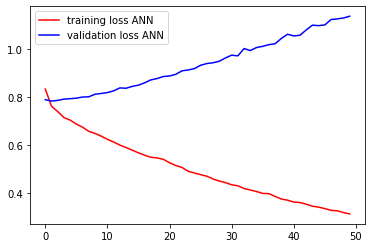

In [55]:
import matplotlib.pyplot as plt

best_history = grid_result.best_estimator_.model.history
epoch = grid_result.best_params_['epochs']

loss = best_history.history['loss']
val_loss = best_history.history['val_loss']

plt.plot(range(epoch), loss, c='r', label='training loss ANN')
plt.plot(range(epoch), val_loss, c='b', label='validation loss ANN')
plt.legend()

In [56]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

best_model = grid_result.best_estimator_.model
Y_pred = best_model.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))

print('Confussion Matrix:')
print(conf_mat)
print()

score = metrics.classification_report(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))
print('Evaluasi Model Terbaik (Accuracy, Precision, Recall, F1-score):\n')
print(score)

Confussion Matrix:
[[ 1  5  0]
 [ 3 24  0]
 [ 0  2  2]]

Evaluasi Model Terbaik (Accuracy, Precision, Recall, F1-score):

              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.77      0.89      0.83        27
           2       1.00      0.50      0.67         4

    accuracy                           0.73        37
   macro avg       0.67      0.52      0.56        37
weighted avg       0.71      0.73      0.71        37



In [57]:
best_model.save('model_ku')

INFO:tensorflow:Assets written to: model_ku\assets
